<a href="https://colab.research.google.com/github/ErendiraCan/CSE341ToDoListAPI/blob/main/CaseStudies/Module07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Module 07: Personal Project

My project is focused in detect what are some of the activities or food that increase or reduce the risk of Heart disease. I found a great data set in Kaggle that includes important features such as age, general health, sex, activities, and other diseases that can increase or reduce the risk of Heart disease.

Here is the link of the data set: https://www.kaggle.com/datasets/alphiree/cardiovascular-diseases-risk-prediction-dataset?resource=download

In [85]:
# Libraries
import pandas as pd
import numpy as np
import altair as alt

# Modified URL with direct download link
csv_url = 'https://drive.google.com/uc?export=download&id=18zro-Gi6L90-r6LwwWUpXS_zZF9goGCm'

# Load the dataset into a dataframe
CDV = pd.read_csv(csv_url)

# Load the dataset into a dataframe
CDV_data = pd.read_csv(csv_url)

# Display the first few rows of the data
CDV.head()


,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163.0,88.45,33.47,No,4.0,12.0,3.0,16.0
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180.0,93.44,28.73,No,0.0,30.0,30.0,8.0
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191.0,88.45,24.37,Yes,0.0,8.0,4.0,0.0


# Cleaning the Data

In [86]:
CDV = CDV.dropna()

In [87]:
# See the values inside General_Health column
General_Health_counts = CDV['General_Health'].value_counts()

# Print the counts
print(General_Health_counts)

Very Good    110395
Good          95364
Excellent     55954
Fair          35810
Poor          11331
Name: General_Health, dtype: int64


In [88]:
General_Health_map = {
    'Excellent': 1,
    'Very Good': 2,
    'Good': 3,
    'Fair': 4,
    'Poor': 5
}

CDV['General_Health'] = CDV['General_Health'].map(General_Health_map)

In [89]:
# See the values inside Checkup column
Checkup_counts = CDV['Checkup'].value_counts()

# Print the counts
print(Checkup_counts)

Within the past year       239371
Within the past 2 years     37213
Within the past 5 years     17442
5 or more years ago         13421
Never                        1407
Name: Checkup, dtype: int64


In [90]:
Checkup_map = {
    'Within the past year': 1,
    'Within the past 2 years': 2,
    'Within the past 5 years': 3,
    '5 or more years ago': 4,
    'Never': 5,
}

CDV['Checkup'] = CDV['Checkup'].map(Checkup_map)

In [91]:
# See the values inside Exercise column
Exercise_counts = CDV['Exercise'].value_counts()

# Print the counts
print(Exercise_counts)

Yes    239381
No      69473
Name: Exercise, dtype: int64


In [92]:
# Convert str to numerical values: Exercise
Exercise_map = {
    'Yes': 1,
    'No': 2
}

CDV['Exercise'] = CDV['Exercise'].map(Exercise_map)

###This is the column I will use as a Target: Heart_Disease

In [93]:
# See the values inside Exercise column
Heart_Disease_counts = CDV['Heart_Disease'].value_counts()

# Print the counts
print(Heart_Disease_counts)

No     283883
Yes     24971
Name: Heart_Disease, dtype: int64


In [94]:
# Convert str to numerical values: Heart_Disease
Heart_Disease_map = {
    'No': 0,
    'Yes': 1
}

CDV['Heart_Disease'] = CDV['Heart_Disease'].map(Heart_Disease_map)

In [95]:
# See the values inside Skin_Cancer column
Skin_Cancer_counts = CDV['Skin_Cancer'].value_counts()

# Print the counts
print(Skin_Cancer_counts)

No     278860
Yes     29994
Name: Skin_Cancer, dtype: int64


In [96]:
# Convert str to numerical values: Skin_Cancer
Skin_Cancer_map = {
    'No': 1,
    'Yes': 2
}

CDV['Skin_Cancer'] = CDV['Skin_Cancer'].map(Skin_Cancer_map)

In [97]:
# See the values inside Other_Cancer column
Other_Cancer_counts = CDV['Other_Cancer'].value_counts()

# Print the counts
print(Other_Cancer_counts)

No     278976
Yes     29878
Name: Other_Cancer, dtype: int64


In [98]:
# Convert str to numerical values: Other_Cancer
Other_Cancer_map = {
    'No': 1,
    'Yes': 2
}

CDV['Other_Cancer'] = CDV['Other_Cancer'].map(Other_Cancer_map)

In [99]:
# See the values inside Depression column
Depression_counts = CDV['Depression'].value_counts()

# Print the counts
print(Depression_counts)

No     246953
Yes     61901
Name: Depression, dtype: int64


In [100]:
# Convert str to numerical values: Depression
Depression_map = {
    'No': 1,
    'Yes': 2
}

CDV['Depression'] = CDV['Depression'].map(Depression_map)

In [101]:
# See the values inside Diabetes column
Diabetes_counts = CDV['Diabetes'].value_counts()

# Print the counts
print(Diabetes_counts)

No                                            259141
Yes                                            40171
No, pre-diabetes or borderline diabetes         6896
Yes, but female told only during pregnancy      2646
Name: Diabetes, dtype: int64


In [102]:
# Convert str to numerical values: Diabetes
Diabetes_map = {
    'No': 1,
    'Yes': 2,
    'No, pre-diabetes or borderline diabetes': 3,
    'Yes, but female told only during pregnancy': 4
}

CDV['Diabetes'] = CDV['Diabetes'].map(Diabetes_map)

In [103]:
# See the values inside Arthritis column
Arthritis_counts = CDV['Arthritis'].value_counts()

# Print the counts
print(Arthritis_counts)

No     207783
Yes    101071
Name: Arthritis, dtype: int64


In [104]:
# Convert str to numerical values: Arthritis
Arthritis_map = {
    'No': 1,
    'Yes': 2
}

CDV['Arthritis'] = CDV['Arthritis'].map(Arthritis_map)

In [105]:
# See the values inside Sex column
Sex_counts = CDV['Sex'].value_counts()

# Print the counts
print(Sex_counts)

Female    160196
Male      148658
Name: Sex, dtype: int64


In [106]:
# Convert str to numerical values: Sex
Sex_map = {
    'Female': 1,
    'Male': 2
}

CDV['Sex'] = CDV['Sex'].map(Sex_map)

In [107]:
# See the values inside Age_Category column
Age_Category_counts = CDV['Age_Category'].value_counts()

# Print the counts
print(Age_Category_counts)

65-69    33434
60-64    32418
70-74    31103
55-59    28054
50-54    25097
80+      22271
40-44    21595
45-49    20968
75-79    20705
35-39    20606
18-24    18681
30-34    18428
25-29    15494
Name: Age_Category, dtype: int64


In [108]:
# Convert str to numerical values: Age_Category
Age_Category_map = {
    '80+': 1,
    '65-69': 2,
    '60-64': 3,
    '70-74': 4,
    '55-59': 5,
    '50-54': 6,
    '40-44': 7,
    '45-49': 8,
    '75-79': 9,
    '35-39': 10,
    '18-24': 11,
    '30-34': 12,
    '25-29': 13
}

CDV['Age_Category'] = CDV['Age_Category'].map(Age_Category_map)

In [109]:
# See the values inside Smoking_History column
Smoking_History_counts = CDV['Smoking_History'].value_counts()

# Print the counts
print(Smoking_History_counts)

No     183590
Yes    125264
Name: Smoking_History, dtype: int64


In [110]:
# Convert str to numerical values: Smoking_History
Smoking_History_map = {
    'No': 1,
    'Yes': 2
}

CDV['Smoking_History'] = CDV['Smoking_History'].map(Smoking_History_map)

In [111]:
# Round the values in the "Height_(cm)" column to two decimal places
CDV['Height_(cm)'] = CDV['Height_(cm)'].round()

In [112]:
# Round the values in the "Weight_(kg)" column to two decimal places
CDV['Weight_(kg)'] = CDV['Weight_(kg)'].round()

In [113]:
# Round the values in the "BMI" column to two decimal places
CDV['BMI'] = CDV['BMI'].round()

In [114]:
CDV.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,5,2,2,0,1,1,1,1,2,1,4,150.0,33.0,15.0,2,0.0,30.0,16.0,12.0
1,2,1,2,1,1,1,1,2,1,1,4,165.0,77.0,28.0,1,0.0,30.0,0.0,4.0
2,2,1,1,0,1,1,1,2,1,1,3,163.0,88.0,33.0,1,4.0,12.0,3.0,16.0
3,5,1,1,1,1,1,1,2,1,2,9,180.0,93.0,29.0,1,0.0,30.0,30.0,8.0
4,3,1,2,0,1,1,1,1,1,2,1,191.0,88.0,24.0,2,0.0,8.0,4.0,0.0


##The Model: Decision Tree Classifier

In [115]:
# scikit learn froms
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics

# Training Data and Testing Data
X_pred = CDV.drop(['Heart_Disease'], axis = 1)
y_pred = CDV['Heart_Disease']


In [116]:
X_train, X_test, y_train, y_test = train_test_split(X_pred, y_pred, test_size = .34, random_state = 76)
y_test

85100     0
61100     0
201134    0
200145    1
254956    0
         ..
144465    0
258426    1
136577    0
293842    1
72230     0
Name: Heart_Disease, Length: 105011, dtype: int64

In [117]:
clf = tree.DecisionTreeClassifier(max_depth=2)
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_probs = clf.predict_proba(X_test)

In [118]:
print(metrics.classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       1.00      0.92      0.96    105011
           1       0.00      0.00      0.00         0

    accuracy                           0.92    105011
   macro avg       0.50      0.46      0.48    105011
weighted avg       1.00      0.92      0.96    105011



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [119]:
df_features = pd.DataFrame(
    {'f_names': X_train.columns,
    'f_values': clf.feature_importances_}).sort_values('f_values', ascending = False)

Metrics = (alt.Chart(df_features.query('f_values > .011'))
    .encode(
        alt.X('f_values', title = "Importance"),
        alt.Y('f_names', sort = '-x', title = "Feature"))
    .mark_bar()
    .properties(title = "Decision Tree Model: Feature Importance"))

Metrics

alt.Chart(...)

In [120]:
from google.colab import files

# use the decision tree model to predict on the holdout set
holdout_test = CDV.drop(['Heart_Disease'], axis = 1)
holdout_predictions = pd.DataFrame(clf.predict(holdout_test), columns = ['Heart_Disease'])

# save
holdout_predictions.to_csv("module7-predictions.csv", index=False)
#files.download("module7-predictions.csv")
holdout_predictions

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Heart_Disease
0,0
1,0
2,0
3,0
4,0
...,...
308849,0
308850,0
308851,0
308852,0


##Data Visualization

I feel everything in the data set was important to increase or reduce the risk of heart disease. But based on the two features the model considered more important than others I decided to do some graphs to visualize it.

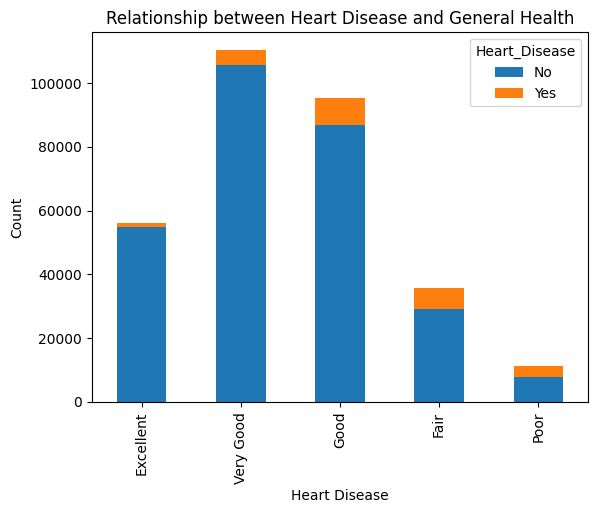

In [127]:
import matplotlib.pyplot as plt
import pandas as pd

# Define the desired order of x-axis labels
desired_order = ['Excellent', 'Very Good', 'Good', 'Fair', 'Poor']

# Create a categorical variable with the desired order
CDV_data['General_Health'] = pd.Categorical(CDV_data['General_Health'], categories=desired_order, ordered=True)

# Group the data by "Heart_Disease" and "General_Health" columns and count the occurrences
grouped_data = CDV_data.groupby(['General_Health', 'Heart_Disease']).size().unstack()

# Plotting the bar plot
grouped_data.plot(kind='bar', stacked=True)

# Set labels and title
plt.xlabel('Heart Disease')
plt.ylabel('Count')
plt.title('Relationship between Heart Disease and General Health')

# Show the plot
plt.show()



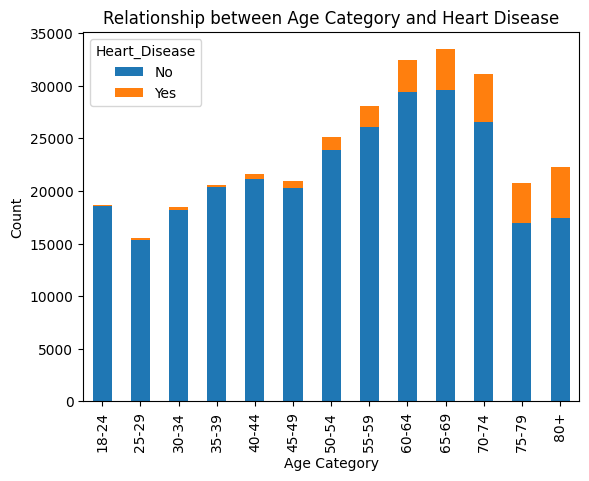

In [124]:
# Group the data by "Age_Category" and "Heart_Disease" columns and count the occurrences
grouped_data = CDV_data.groupby(['Age_Category', 'Heart_Disease']).size().unstack()

# Plotting the stacked bar plot
grouped_data.plot(kind='bar', stacked=True)

# Set labels and title
plt.xlabel('Age Category')
plt.ylabel('Count')
plt.title('Relationship between Age Category and Heart Disease')

# Show the plot
plt.show()